In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
#from keras.applications.vgg16 import preprocess_input
#from keras.models import Sequential
#from keras.applications import VGG16 
#from keras.layers import Activation, Dense
import os


from keras.preprocessing.image import ImageDataGenerator

import keras 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.callbacks import TensorBoard

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#the path of images on disk
TRAIN_DIR='/home/tasneem/Downloads/PH2.16/train'
VALID_DIR='/home/tasneem/Downloads/PH2.16/valid/'
TEST_DIR='/home/tasneem/Downloads/PH2.16/test/'

#TRAIN_DIR = '/home/tasneem/Downloads/data/train'
#VALID_DIR = '/home/tasneem/Downloads/data/validation'
#TEST_DIR = '/home/tasneem/Downloads/data/test'

IMAGE_SIZE=200

In [3]:
def classNum():
    # useful for getting number of files
    image_files = glob(TRAIN_DIR + '/*/*.bmp')
    valid_image_files = glob(VALID_DIR + '/*/*.bmp')
    # getting the number of classes i.e. type of fruits
    folders = glob(TRAIN_DIR + '/*')
    num_classes = len(folders)
    print ('Total Classes = ' + str(num_classes))

In [4]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)



#The above operation is performed so that machine 
#can recognize sheared, zoomed or horizontal versions of same image from training dataset.



train_batches= train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                 batch_size = 15,
                                                class_mode='categorical')
valid_batches= ImageDataGenerator().flow_from_directory(VALID_DIR,target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                 batch_size = 5,
                                                class_mode='categorical')
test_batches= test_datagen.flow_from_directory(TEST_DIR, target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                 batch_size = 5,
                                                class_mode='categorical')



def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
      if type(ims[0]) is np.ndarray:
            ims= np.array(ims).astype(np.uint8)
            if (ims.shape[-1] != 3):
                ims = ims.transpose((0,2,3,1))
            f = plt.figure(figsize=figsize)
            cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows +1
            for i in range(len(ims)):
                sp=f.add_subplot(rows, cols, i+1)
                sp.axis('Off')
                if titles is not None:
                    sp.set_title(titles[i], fontsize=16)
            plt.imshow(ims[i], interpolation=None if interp else 'none')

Found 160 images belonging to 3 classes.
Found 20 images belonging to 3 classes.
Found 20 images belonging to 3 classes.


In [5]:
imgs, labels = next(train_batches)

/home/tasneem/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


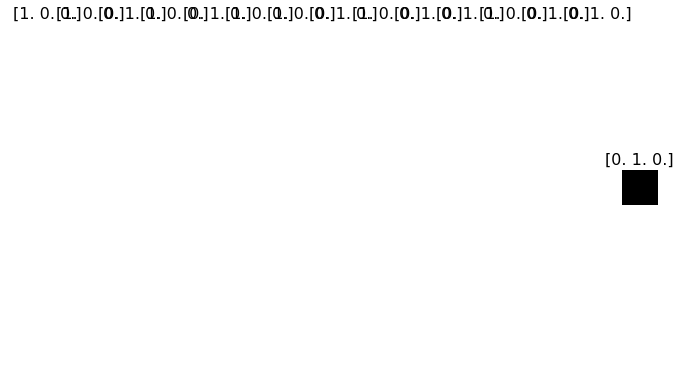

In [6]:
plots(imgs,titles=labels)

In [7]:
print(labels)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


Epoch 1/50
32/32 [==============================] - 4s 127ms/step - loss: 1.2930 - acc: 0.3814 - val_loss: 0.9695 - val_acc: 0.4600
Epoch 2/50
32/32 [==============================] - 3s 85ms/step - loss: 0.9812 - acc: 0.4865 - val_loss: 0.9373 - val_acc: 0.5200
Epoch 3/50
32/32 [==============================] - 3s 89ms/step - loss: 0.8674 - acc: 0.5615 - val_loss: 0.8675 - val_acc: 0.4800
Epoch 4/50
32/32 [==============================] - 3s 89ms/step - loss: 0.8203 - acc: 0.5896 - val_loss: 0.8276 - val_acc: 0.6200
Epoch 5/50
32/32 [==============================] - 3s 89ms/step - loss: 0.8847 - acc: 0.5447 - val_loss: 0.8429 - val_acc: 0.6000
Epoch 6/50
32/32 [==============================] - 3s 87ms/step - loss: 0.7625 - acc: 0.6365 - val_loss: 0.8031 - val_acc: 0.6000
Epoch 7/50
32/32 [==============================] - 3s 91ms/step - loss: 0.7581 - acc: 0.6313 - val_loss: 0.7894 - val_acc: 0.5400
Epoch 8/50
32/32 [==============================] - 3s 89ms/step - loss: 0.7225 - 

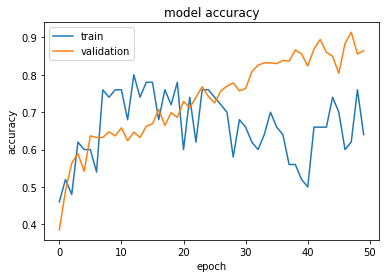

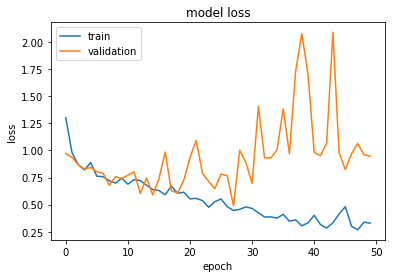

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation ='relu', input_shape=(200, 200, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides = 1, activation ='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation ='softmax'))



model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])









#//هنا نسوي call للداتاسيت ترين
#model.fit(train_batches, valid_batches, epochs=15 , batch_size=41)

#model.fit(TRAIN_DIR, train_batches, batch_size=41, epochs=15, verbose=1,
          #validation_data=(VALID_DIR, valid_batches), callbacks=[])
    
#model.fit(train_batches, valid_batches, batch_size=41, epochs=3, validation_split=0.3)
#history = model.fit_generator(train_batches, 
#				 	steps_per_epoch=3,
#				 	epochs=40,
#					validation_data=valid_batches,
#					validation_steps=1,
#					)
#Python

history =model.fit_generator(train_batches,
                         steps_per_epoch = (160/5),
                         epochs = 50,
                         validation_data = test_batches,
                         validation_steps = (20/2))


model.summary()




# list all data in history
print(history.history.keys())

plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
